In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

file_path = r'retail_price.csv'
data_raw = pd.read_csv(file_path)
data = pd.read_csv(file_path)

In [171]:
data_raw.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [172]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

### EDA

In [173]:
summary_stats = data_raw.describe()
summary_stats

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [174]:
missing_values = data_raw.isnull().sum()
missing_values

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

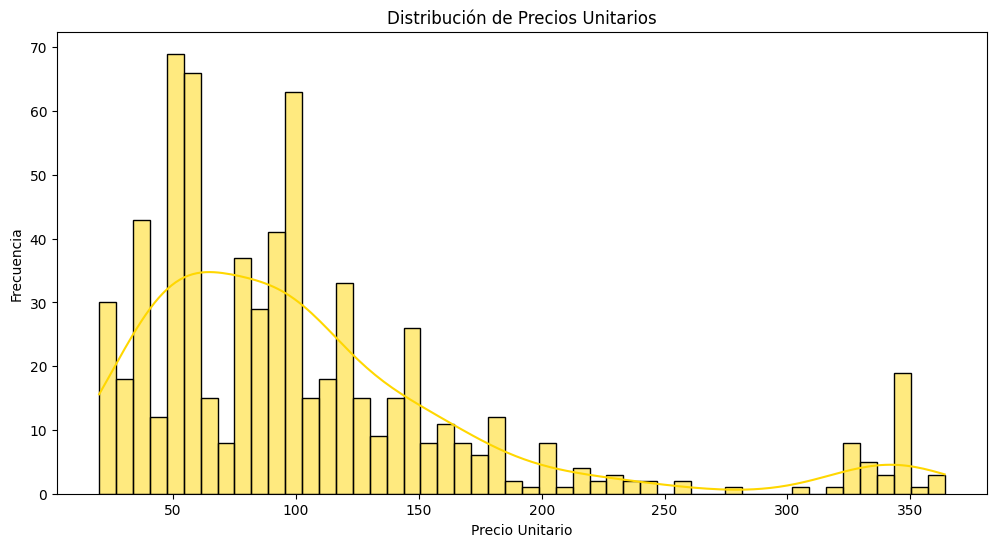

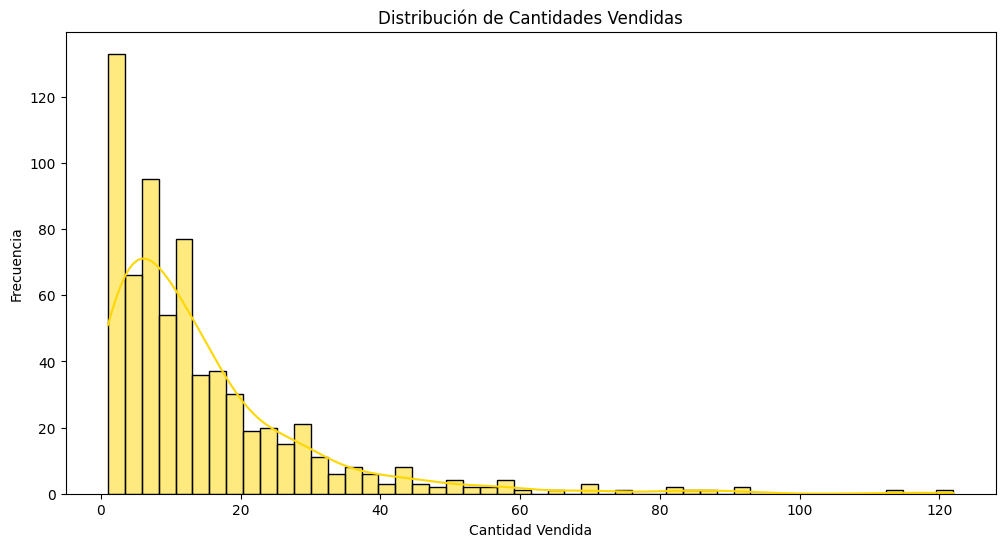

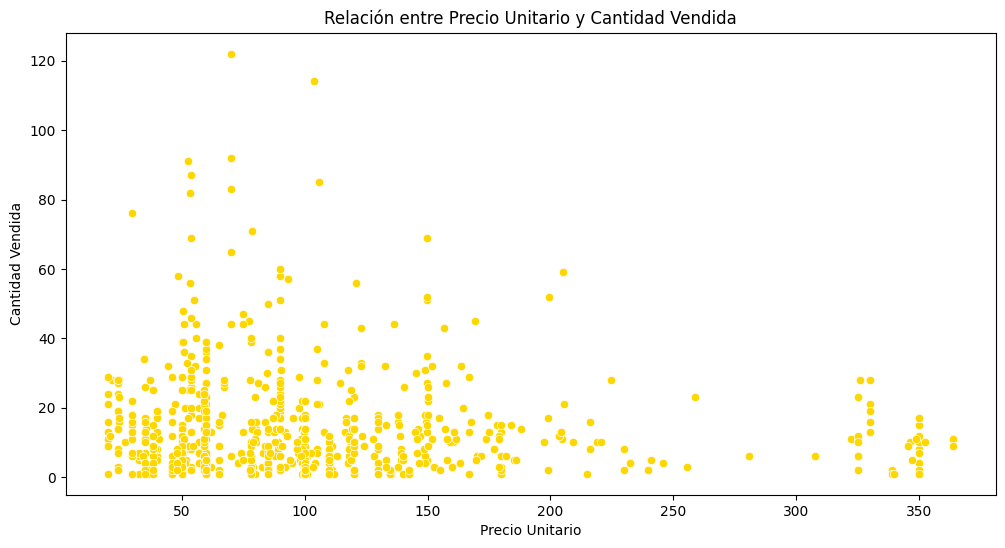

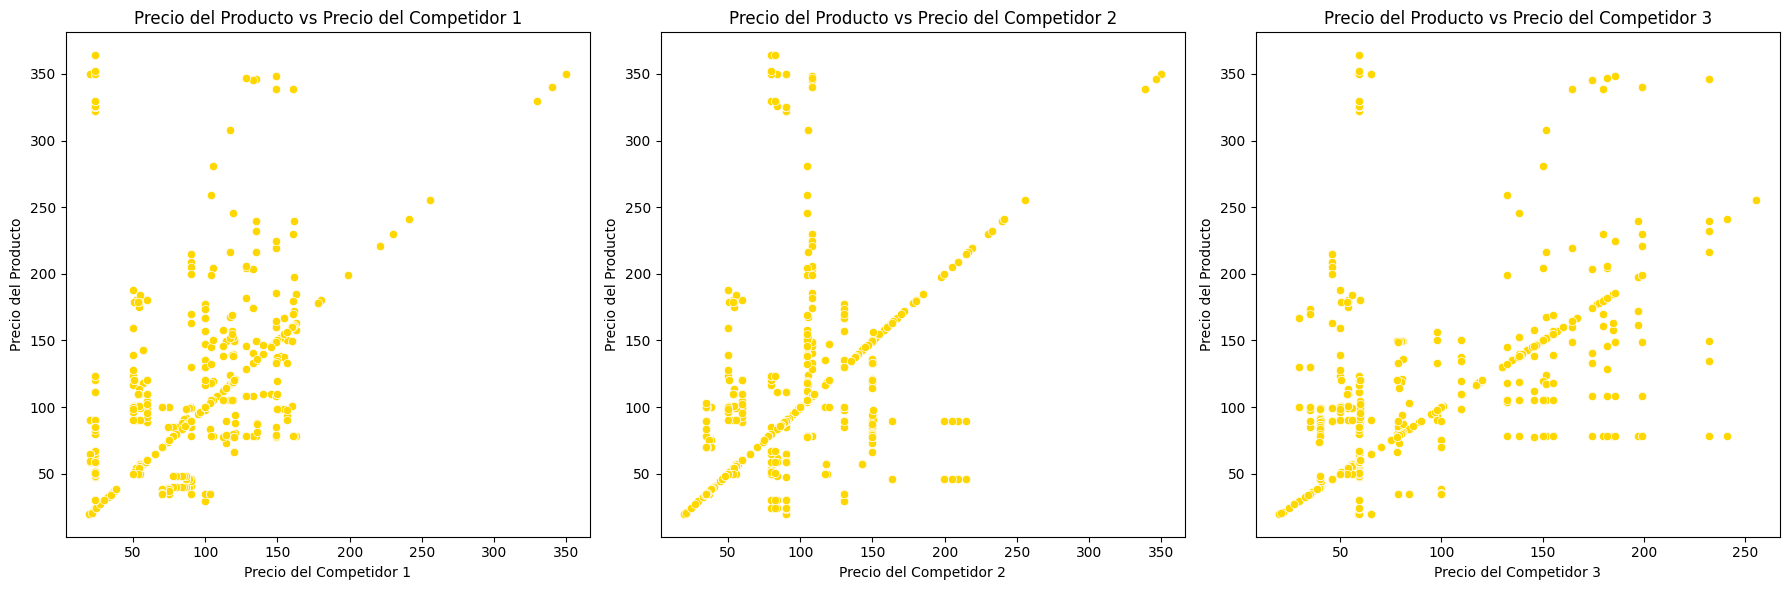

In [175]:
plt.figure(figsize=(12, 6))
sns.histplot(data_raw['unit_price'], bins=50, kde=True, color='#FFD700')
plt.title('Distribución de Precios Unitarios')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data_raw['qty'], bins=50, kde=True, color='#FFD700')
plt.title('Distribución de Cantidades Vendidas')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_raw['unit_price'], y=data_raw['qty'], color='#FFD700')
plt.title('Relación entre Precio Unitario y Cantidad Vendida')
plt.xlabel('Precio Unitario')
plt.ylabel('Cantidad Vendida')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(x=data_raw['comp_1'], y=data_raw['unit_price'], ax=axes[0], color='#FFD700')
axes[0].set_title('Precio del Producto vs Precio del Competidor 1')
axes[0].set_xlabel('Precio del Competidor 1')
axes[0].set_ylabel('Precio del Producto')

sns.scatterplot(x=data_raw['comp_2'], y=data_raw['unit_price'], ax=axes[1], color='#FFD700')
axes[1].set_title('Precio del Producto vs Precio del Competidor 2')
axes[1].set_xlabel('Precio del Competidor 2')
axes[1].set_ylabel('Precio del Producto')

sns.scatterplot(x=data_raw['comp_3'], y=data_raw['unit_price'], ax=axes[2], color='#FFD700')
axes[2].set_title('Precio del Producto vs Precio del Competidor 3')
axes[2].set_xlabel('Precio del Competidor 3')
axes[2].set_ylabel('Precio del Producto')

plt.tight_layout()
plt.show()


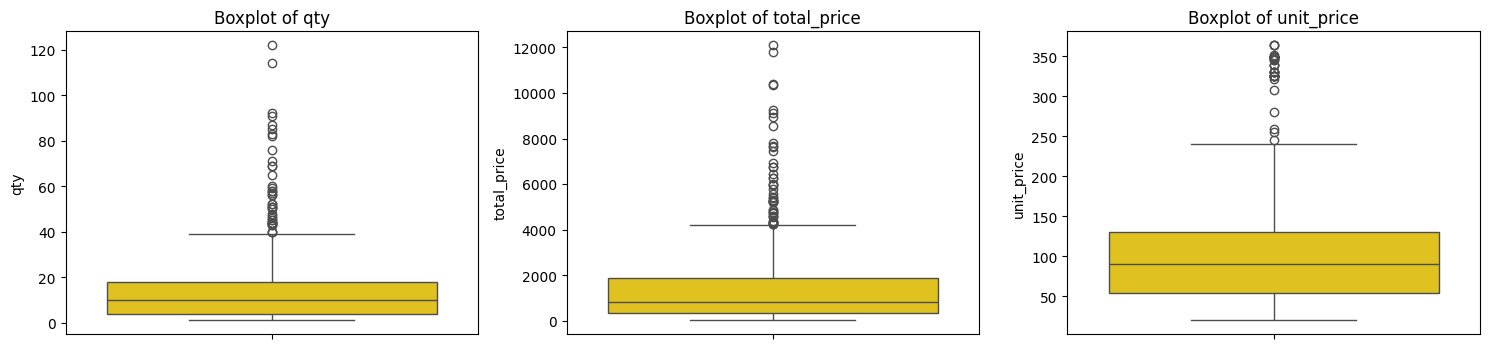

In [176]:
numeric_vars = ['qty', 'total_price', 'unit_price']
plt.figure(figsize=(15, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data_raw[var], color='#FFD700') 
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

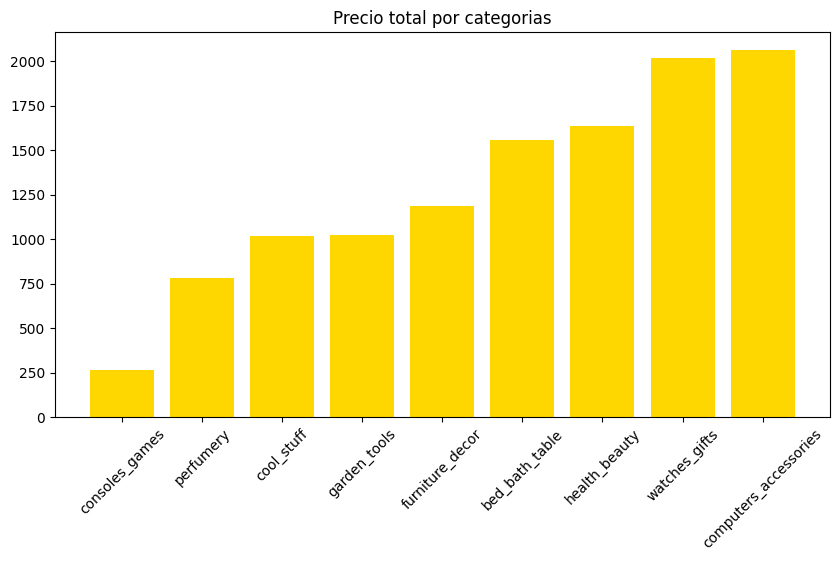

In [177]:
prod_category = data_raw[["product_category_name", "total_price"]].groupby("product_category_name").mean().sort_values(by="total_price")
plt.figure(figsize=(10, 5))
plt.bar(prod_category.index, prod_category["total_price"], color ='#FFD700')
plt.title("Precio total por categorias")
plt.xticks(rotation=45)
plt.show()

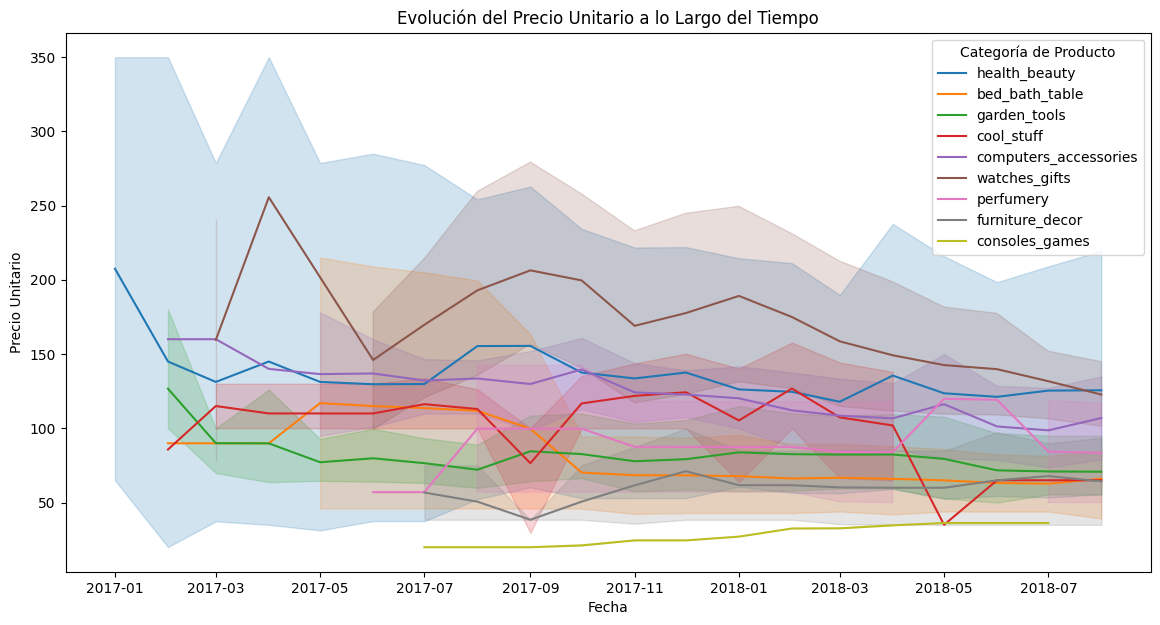

In [178]:
data['month_year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y')
data = data.sort_values('month_year')

plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='month_year', y='unit_price', hue='product_category_name')
plt.title('Evolución del Precio Unitario a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio Unitario')
plt.legend(title='Categoría de Producto')
plt.show()

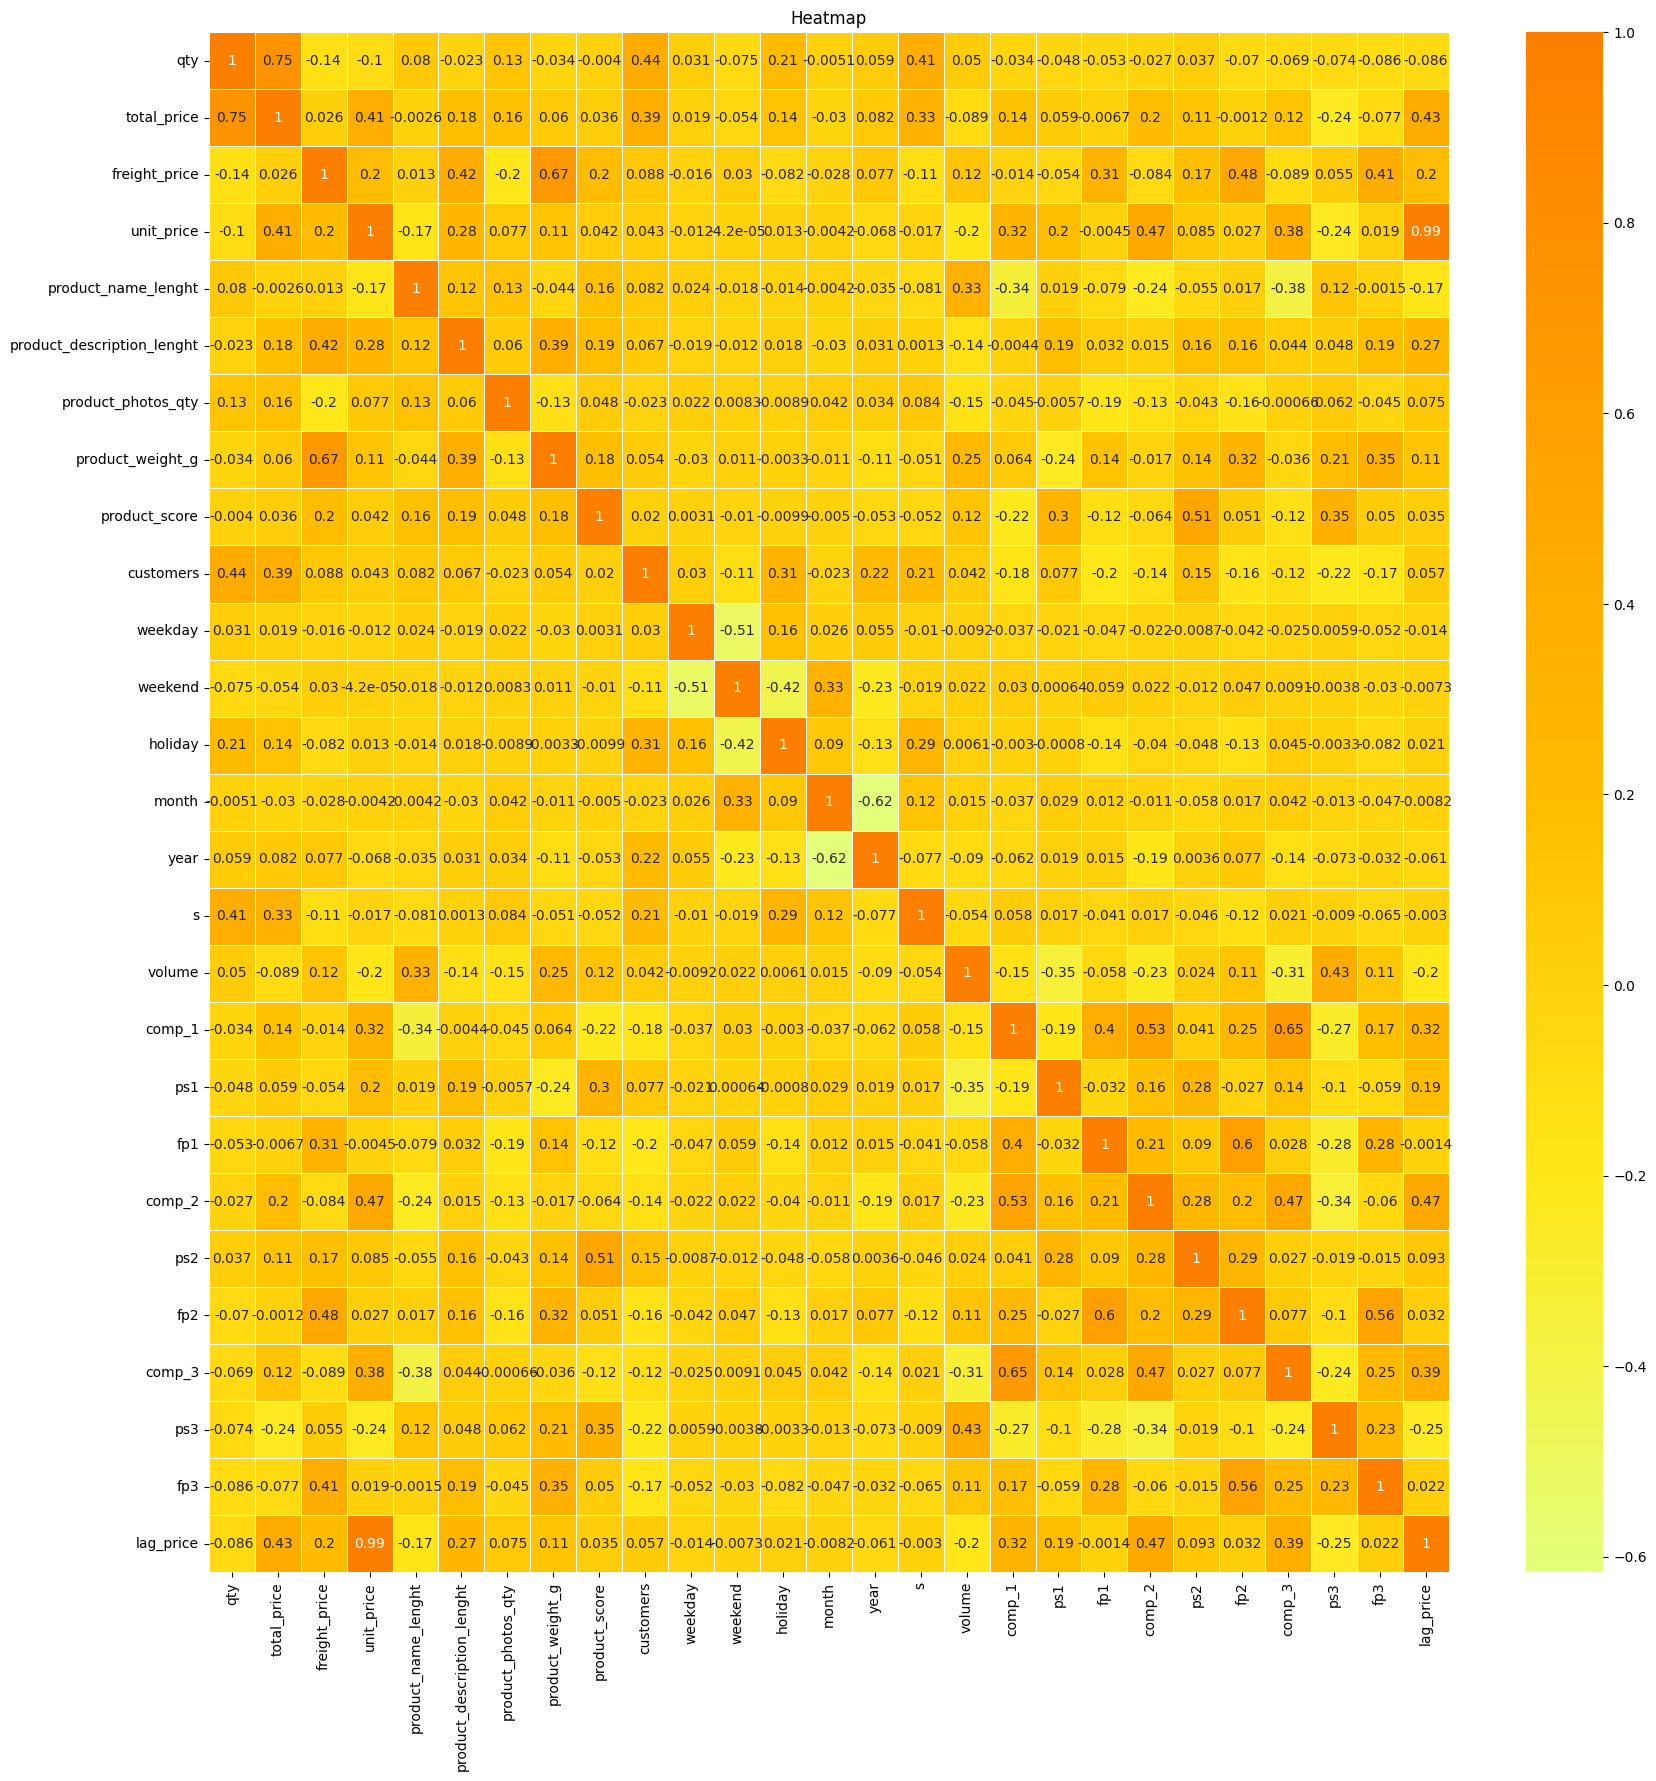

In [179]:
num_data = data_raw[['qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price']]

plt.figure(figsize=(20, 20))
sns.heatmap(num_data.corr(), annot=True, cmap='Wistia', linewidths=0.5)
plt.title('Heatmap')
plt.show()

### Preparación datos

In [180]:
missing_values = data_raw.isnull().sum()
duplicate_rows = data_raw.duplicated().sum()

print("Valores faltantes por columna:\n", missing_values)
print("\nNúmero de filas duplicadas:", duplicate_rows)

Valores faltantes por columna:
 product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: i

In [181]:
data_raw['month_year'] = pd.to_datetime(data_raw['month_year'], format='%d-%m-%Y')

In [182]:
data_cleaned = data_raw.drop_duplicates()

In [183]:
data_cleaned['comp_avg_price'] = data_cleaned[['comp_1', 'comp_2', 'comp_3']].mean(axis=1)

In [184]:
data_cleaned['price_diff_comp1'] = data_cleaned['unit_price'] - data_cleaned['comp_1']
data_cleaned['price_diff_comp2'] = data_cleaned['unit_price'] - data_cleaned['comp_2']
data_cleaned['price_diff_comp3'] = data_cleaned['unit_price'] - data_cleaned['comp_3']

data_cleaned["price_ratio_1"] = data_cleaned["unit_price"] / data_cleaned["comp_1"]
data_cleaned["price_ratio_2"] = data_cleaned["unit_price"] / data_cleaned["comp_2"]
data_cleaned["price_ratio_3"] = data_cleaned["unit_price"] / data_cleaned["comp_3"]

In [185]:
data_cleaned['price_trend'] = data_cleaned['unit_price'] - data_cleaned['lag_price']

In [186]:
data_cleaned = data_cleaned.drop(['product_name_lenght', 'product_description_lenght', 'volume'], axis=1)

In [187]:
features = ['qty', 'freight_price', 'unit_price', 'product_weight_g', 'product_score', 
                    'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's', 
                     'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3']

In [188]:
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    return outliers

# Identificar outliers en las características seleccionadas
outlier_indices = detect_outliers(data_cleaned, features)
outlier_indices

{'qty': Index([ 90, 140, 141, 143, 152, 153, 164, 175, 176, 178, 195, 196, 200, 201,
        206, 231, 257, 258, 260, 276, 277, 282, 441, 442, 443, 447, 471, 492,
        497, 498, 499, 500, 501, 502, 503, 593, 595, 596, 612, 654, 673, 674],
       dtype='int64'),
 'freight_price': Index([ 18,  19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  85,  87,  88,
         90,  92, 173, 237, 239, 240, 241, 242, 243, 244, 247, 248, 249, 276,
        277, 287, 355, 357, 388, 425, 428, 429, 430, 432, 433, 434, 435, 436,
        437, 514, 516, 518, 553, 557, 558, 559, 560, 561, 562, 563, 565, 566,
        585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 597, 598, 599,
        600, 617, 618, 619, 620, 621],
       dtype='int64'),
 'unit_price': Index([339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
        353, 354, 355, 356, 357, 358, 537, 538, 539, 540, 541, 542, 543, 544,
        545, 546, 547, 548, 549, 601, 602, 603, 604, 605, 606, 607, 608, 609,
        610, 611, 

In [189]:
def remove_outliers(df, outlier_indices):
    unique_indices = np.unique(np.concatenate([v for v in outlier_indices.values()]))
    df_cleaned = df.drop(index=unique_indices)
    return df_cleaned

data_no_outliers = remove_outliers(data_cleaned, outlier_indices)

In [190]:

numeric_columns = data_no_outliers.select_dtypes(include=[np.number]).columns

data_final_no_outliers = data_no_outliers

In [191]:
data_cleaned

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_photos_qty,product_weight_g,product_score,...,fp3,lag_price,comp_avg_price,price_diff_comp1,price_diff_comp2,price_diff_comp3,price_ratio_1,price_ratio_2,price_ratio_3,price_trend
0,bed1,bed_bath_table,2017-05-01,1,45.95,15.100000,45.950000,2,350,4.0,...,15.100000,45.900000,116.950000,-43.950000,-169.050000,0.000000,0.511123,0.213721,1.000000,0.050000
1,bed1,bed_bath_table,2017-06-01,3,137.85,12.933333,45.950000,2,350,4.0,...,12.933333,45.950000,114.950000,-43.950000,-163.050000,0.000000,0.511123,0.219856,1.000000,0.000000
2,bed1,bed_bath_table,2017-07-01,6,275.70,14.840000,45.950000,2,350,4.0,...,14.840000,45.950000,113.616667,-43.950000,-159.050000,0.000000,0.511123,0.224146,1.000000,0.000000
3,bed1,bed_bath_table,2017-08-01,4,183.80,14.287500,45.950000,2,350,4.0,...,14.287500,45.950000,111.786601,-43.950000,-153.559804,0.000000,0.511123,0.230314,1.000000,0.000000
4,bed1,bed_bath_table,2017-09-01,2,91.90,15.100000,45.950000,2,350,4.0,...,15.100000,45.950000,99.749570,-43.950000,-117.448710,0.000000,0.511123,0.281214,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,2017-05-01,1,215.00,8.760000,215.000000,5,9750,4.4,...,15.100000,214.950000,116.950000,125.100000,0.000000,169.050000,2.391546,1.000000,4.678999,0.050000
672,bed5,bed_bath_table,2017-06-01,10,2090.00,21.322000,209.000000,5,9750,4.4,...,12.933333,215.000000,114.950000,119.100000,0.000000,163.050000,2.324805,1.000000,4.548422,-6.000000
673,bed5,bed_bath_table,2017-07-01,59,12095.00,22.195932,205.000000,5,9750,4.4,...,14.840000,209.000000,113.616667,115.100000,0.000000,159.050000,2.280311,1.000000,4.461371,-4.000000
674,bed5,bed_bath_table,2017-08-01,52,10375.00,19.412885,199.509804,5,9750,4.4,...,14.287500,205.000000,111.786601,109.609804,0.000000,153.559804,2.219241,1.000000,4.341889,-5.490196


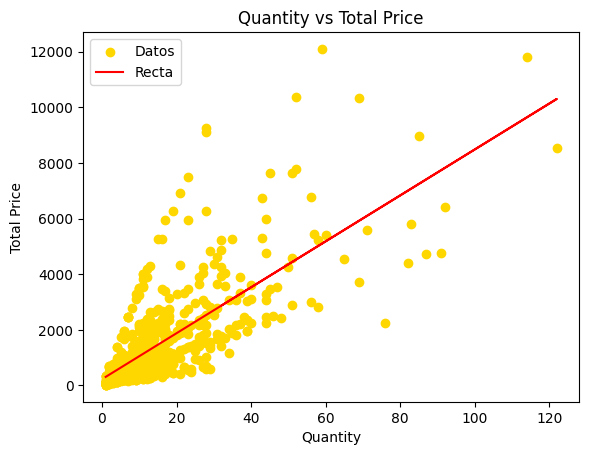

In [192]:
plt.scatter(data_cleaned['qty'], data_cleaned['total_price'], color='#FFD700', label='Datos')

X = data_cleaned['qty'].values.reshape(-1, 1)
y = data_cleaned['total_price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
recta = reg.predict(X)


plt.plot(data_cleaned['qty'], recta, color='red', label='Recta')
plt.title('Quantity vs Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.legend()

plt.show()

### Modelo

In [193]:
features = ['qty','freight_price', 'product_weight_g', 'product_score', 
                    'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's', 
                     'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3']

target = 'unit_price'

X = data_final_no_outliers[features]
y = data_final_no_outliers[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R-cuadrado (R²): {r2}")

resultados = pd.DataFrame({"Real": y_test, "Predicho": y_pred})
print(resultados.head())

Error Cuadrático Medio (MSE): 306.1727970510824
R-cuadrado (R²): 0.7496563544546196
      Real   Predicho
631  29.90  30.379902
188  66.99  79.124037
138  59.90  59.972847
391  64.99  77.795631
510  59.90  58.773129


In [194]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Error Cuadrático Medio (MSE) con Ridge: {mse_ridge}")
print(f"R-cuadrado (R²) con Ridge: {r2_ridge}")

resultados_ridge = pd.DataFrame({"Real": y_test, "Predicho": y_pred_ridge})
print(resultados_ridge.head())

Error Cuadrático Medio (MSE) con Ridge: 333.4038943333259
R-cuadrado (R²) con Ridge: 0.7273907180835988
      Real   Predicho
631  29.90  34.788655
188  66.99  78.712566
138  59.90  59.613065
391  64.99  76.627636
510  59.90  61.820740


In [195]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Error Cuadrático Medio (MSE) con Lasso: {mse_lasso}")
print(f"R-cuadrado (R²) con Lasso: {r2_lasso}")

resultados_lasso = pd.DataFrame({"Real": y_test, "Predicho": y_pred_lasso})
print(resultados_lasso.head())

Error Cuadrático Medio (MSE) con Lasso: 319.51238799760523
R-cuadrado (R²) con Lasso: 0.7387491743922463
      Real   Predicho
631  29.90  33.228351
188  66.99  79.747898
138  59.90  59.453339
391  64.99  77.308050
510  59.90  60.727845


In [196]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Error Cuadrático Medio (MSE) con Random Forest: {mse_rf}")
print(f"R-cuadrado (R²) con Random Forest: {r2_rf}")

resultados_rf = pd.DataFrame({"Real": y_test, "Predicho": y_pred_rf})
print(resultados_rf.head())

Error Cuadrático Medio (MSE) con Random Forest: 96.92769015369922
R-cuadrado (R²) con Random Forest: 0.920746612562965
      Real   Predicho
631  29.90  32.981500
188  66.99  73.278307
138  59.90  59.900000
391  64.99  61.189467
510  59.90  59.154500


In [197]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Error Cuadrático Medio (MSE) con Gradient Boosting: {mse_gb}")
print(f"R-cuadrado (R²) con Gradient Boosting: {r2_gb}")

resultados_gb = pd.DataFrame({"Real": y_test, "Predicho": y_pred_gb})
print(resultados_gb.head())

Error Cuadrático Medio (MSE) con Gradient Boosting: 91.74417449688694
R-cuadrado (R²) con Gradient Boosting: 0.9249849388243652
      Real   Predicho
631  29.90  30.752402
188  66.99  69.946156
138  59.90  60.729964
391  64.99  64.026686
510  59.90  59.644484


In [198]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mejor Error Cuadrático Medio (MSE): {mse_best}")
print(f"Mejor R-cuadrado (R²): {r2_best}")

resultados_best = pd.DataFrame({"Real": y_test, "Predicho": y_pred_best})
print(resultados_best.head())

Mejor Error Cuadrático Medio (MSE): 80.84188124681239
Mejor R-cuadrado (R²): 0.933899250818494
      Real   Predicho
631  29.90  27.012340
188  66.99  70.195938
138  59.90  60.300150
391  64.99  64.355307
510  59.90  59.142405


In [199]:
features = ['qty', 'freight_price', 'product_weight_g', 'product_score', 
            'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's', 
            'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3']

target = 'unit_price'

X = data_final_no_outliers[features]
y = data_final_no_outliers[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

modelos = [lr_model, ridge_model, lasso_model, rf_model, gb_model]

def validar_modelo(modelo, X, y, cv=5):
    scores = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=cv)
    rmse_scores = np.sqrt(-scores)
    print(f"Modelo: {modelo.__class__.__name__}")
    print(f"Scores: {rmse_scores}")
    print(f"Mean: {rmse_scores.mean()}")
    print(f"Standard Deviation: {rmse_scores.std()}")
    print("\n")

for modelo in modelos:
    validar_modelo(modelo, X, y)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mejor Error Cuadrático Medio (MSE): {mse_best}")
print(f"Mejor R-cuadrado (R²): {r2_best}")

resultados_best = pd.DataFrame({"Real": y_test, "Predicho": y_pred_best})
resultados_best.head()

Modelo: LinearRegression
Scores: [26.98873364 24.99181527  9.32348587 32.31952931 22.18875644]
Mean: 23.162464105609885
Standard Deviation: 7.672080976922194


Modelo: Ridge
Scores: [27.12766145 24.6949743   8.37112094 29.03913815 21.91979961]
Mean: 22.230538892753394
Standard Deviation: 7.3292878217367


Modelo: Lasso
Scores: [26.24581303 24.52345828  8.14801898 30.31795309 21.88421555]
Mean: 22.223891786664893
Standard Deviation: 7.552791008696239


Modelo: RandomForestRegressor
Scores: [28.88768428 18.28333336 12.13187641 31.97027737 32.48616295]
Mean: 24.751866875426522
Standard Deviation: 8.125710514023176


Modelo: GradientBoostingRegressor
Scores: [33.17377174 18.05951204  9.23535926 35.91432709 31.96632337]
Mean: 25.669858702065625
Standard Deviation: 10.28507130793167


Mejor Error Cuadrático Medio (MSE): 80.84188124681239
Mejor R-cuadrado (R²): 0.933899250818494


,Real,Predicho
631,29.90,27.012340
188,66.99,70.195938
138,59.90,60.300150
391,64.99,64.355307
510,59.90,59.142405


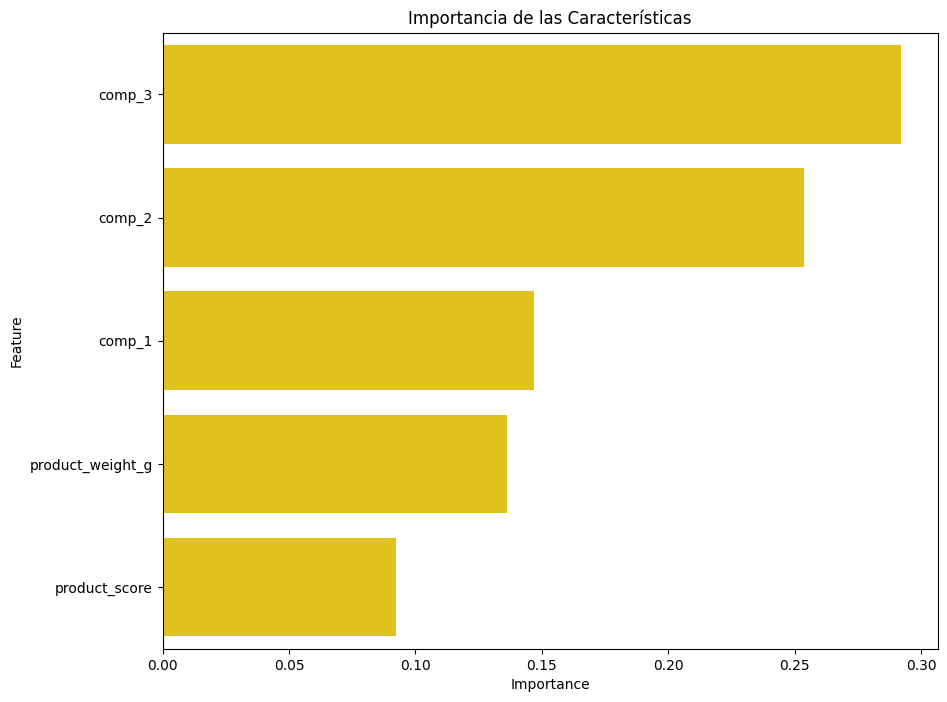

In [201]:
feature_importances = best_model.feature_importances_

features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, color = '#FFD700')
plt.title('Importancia de las Características')
plt.show()